# Scikit Learn Project

Scikit Learn webpage: https://scikit-learn.org/stable/

***

<br>

## Introduction

# TO DO

- Re-do classification algorithms passing through only the four columns with highest correlations to quality. 

- look at Ian's Simple linear regression notebook: https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/simple-linear-regression.ipynb to improve the diabetes code
***

<br>

## Objective
***

To predict the quality score of the wine based on its chemical properties. 

<br>

## Introduction to the Wine Quality Data Set
***

This data set can be found at: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Article based on this data set: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

Useful article: <br>
Regression from scratch — Wine quality predictionhttps://medium.datadriveninvestor.com/regression-from-scratch-wine-quality-prediction-d61195cb91c8

## Import libraries

In [93]:
# Numerical array.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Plotting nice statistical plots.
import seaborn as sns

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

#LINEar regre, 
from sklearn.linear_model import LinearRegression


In [4]:
# Adjusting plot size to standard size.
plt.rcParams['figure.figsize'] = (15, 10)

# Setting colour scheme.
plt.style.use('ggplot')

In [5]:
# Loading the Wine Quality Data Set
df = pd.read_csv("data/winequality_red.csv")    # Using the red wine data set

# View the dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# Retrieve general information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Converted dataset from xlxs file to csv and corrected the csv file by replacing all of the semi-colons with commas.

In [7]:
# Statistical summary
df.describe().round(2)  # round data to 2 decimal places

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


<br>

## Visualising the data

***

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

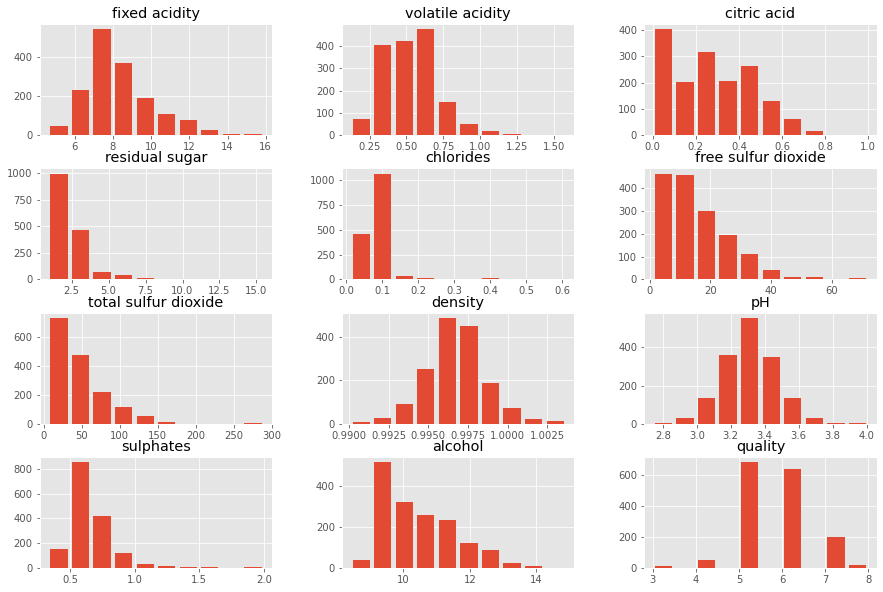

In [8]:
# Histogram of each variable
df.hist(rwidth=0.8)

<br>

## Correlations


Using the seaborn correlation heatmap, we can visualise the highest correlations between individual variables and quality(the dependent variable). 

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


<AxesSubplot:>

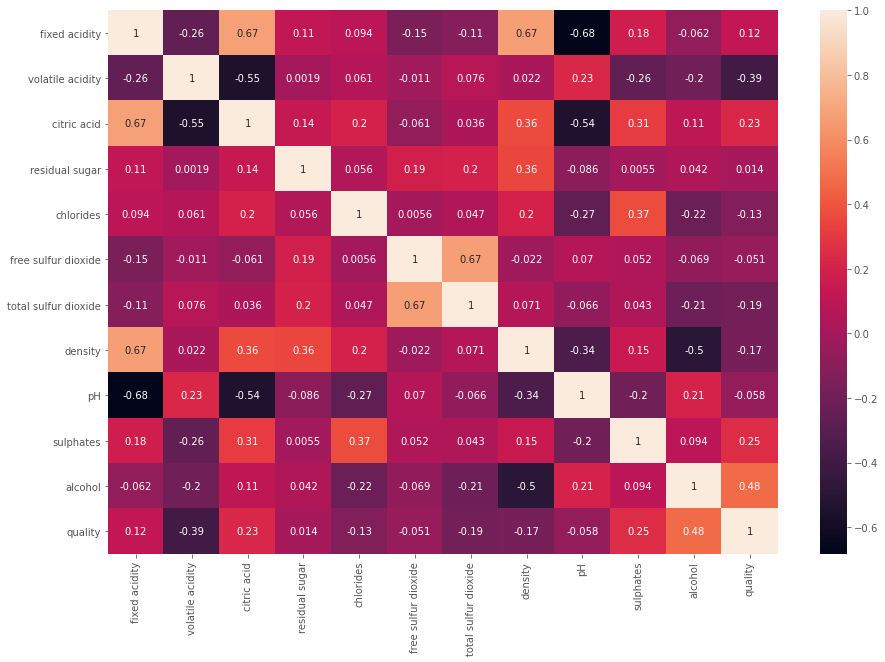

In [9]:
# Get correlation values. 
correlations = df.corr()['quality'].drop('quality')
print(correlations)

# Correlations heatmap.
sns.heatmap(df.corr(), annot=True)

Most significant correalations:
- higher alcohol content correlated with higher quality scores. 
- higher volatile acidity correlated with lower quality scores|. 

In [10]:
# Gets absolute numeric values of correlation results.
abs_corrs = correlations.abs()

# Save four columns with significantly high correlations.
correlations = correlations.nlargest(4)
print(correlations)

alcohol          0.476166
sulphates        0.251397
citric acid      0.226373
fixed acidity    0.124052
Name: quality, dtype: float64


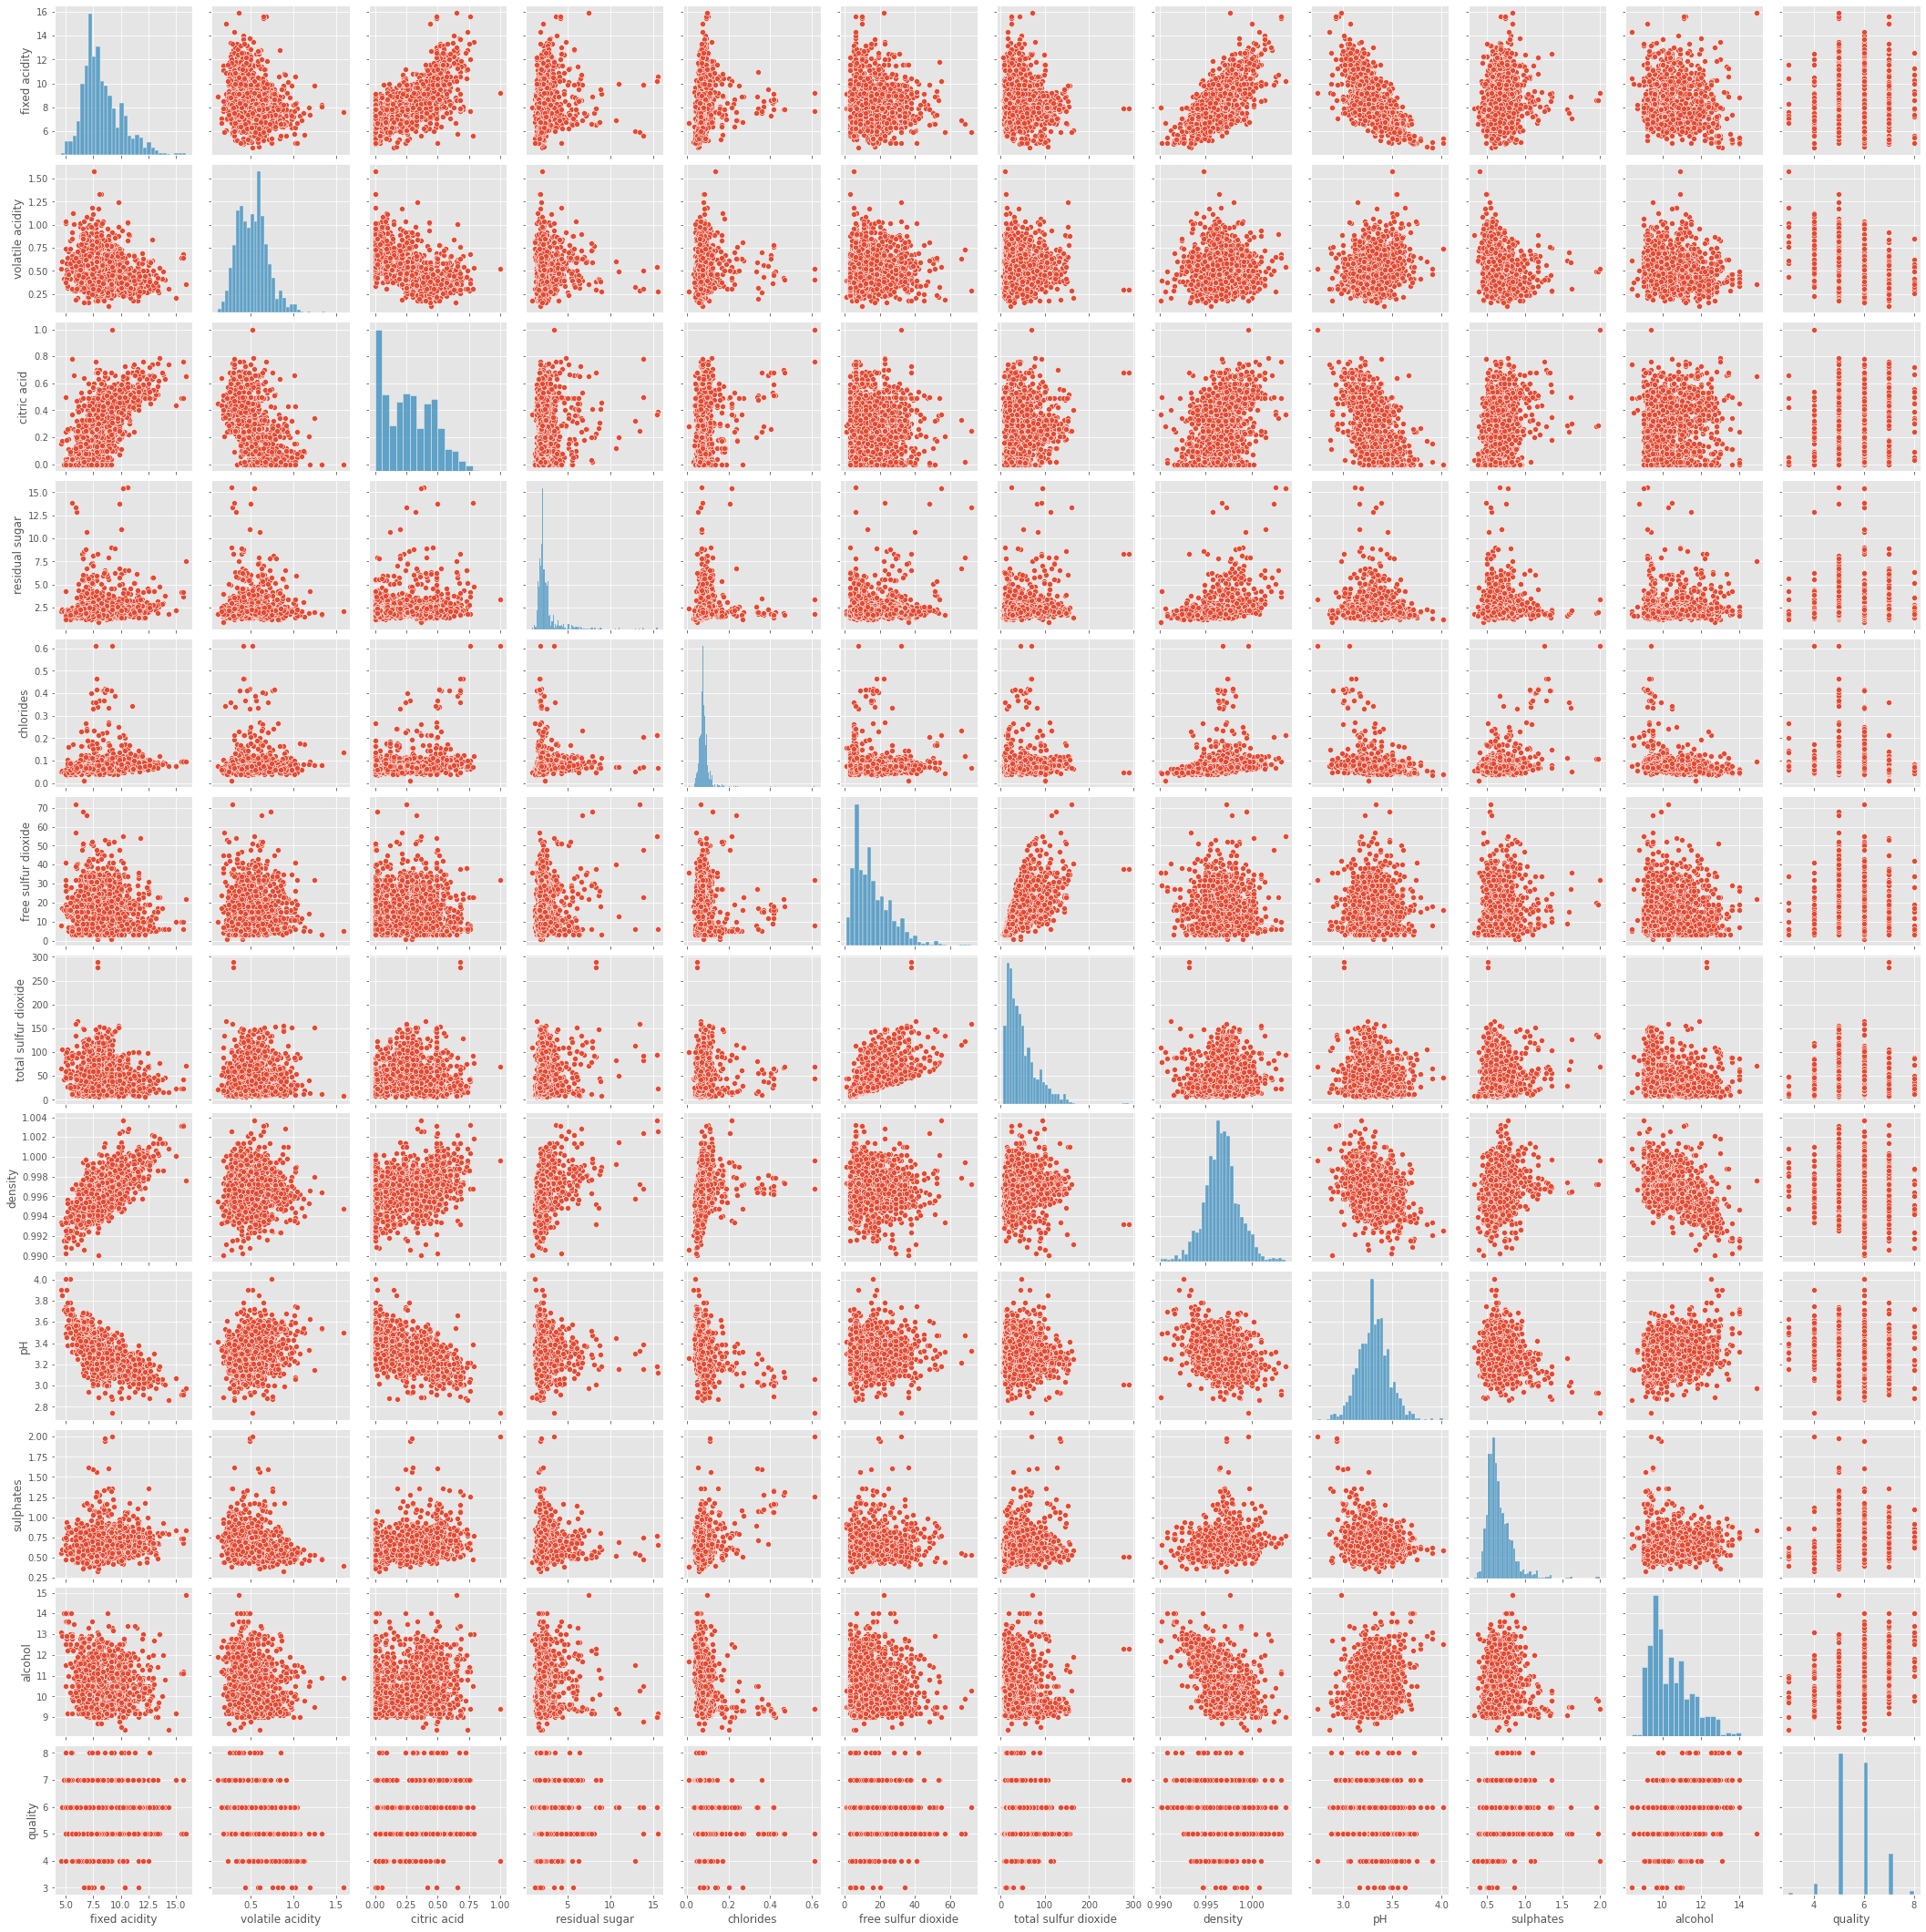

In [11]:
# Pair plots.
sns.pairplot(df)
plt.show()


## Two Dimensions

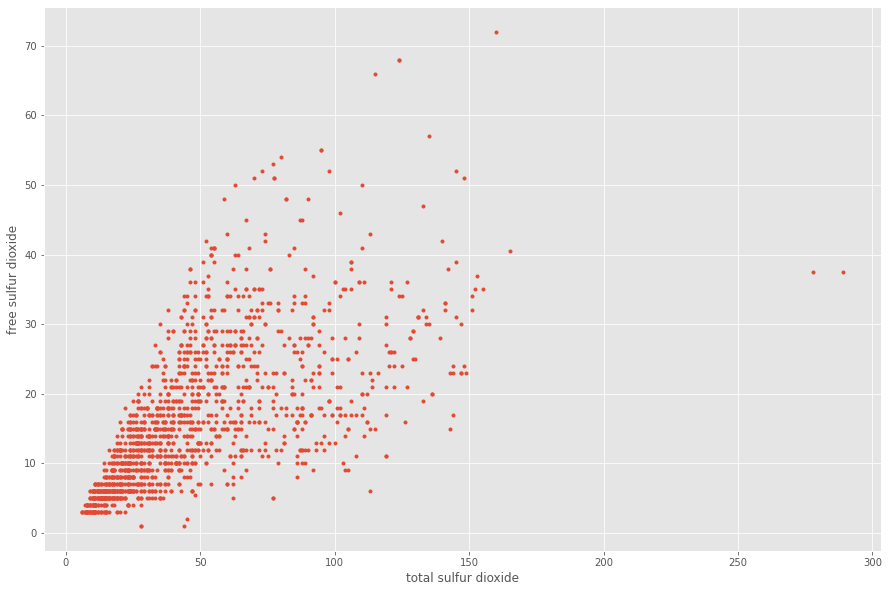

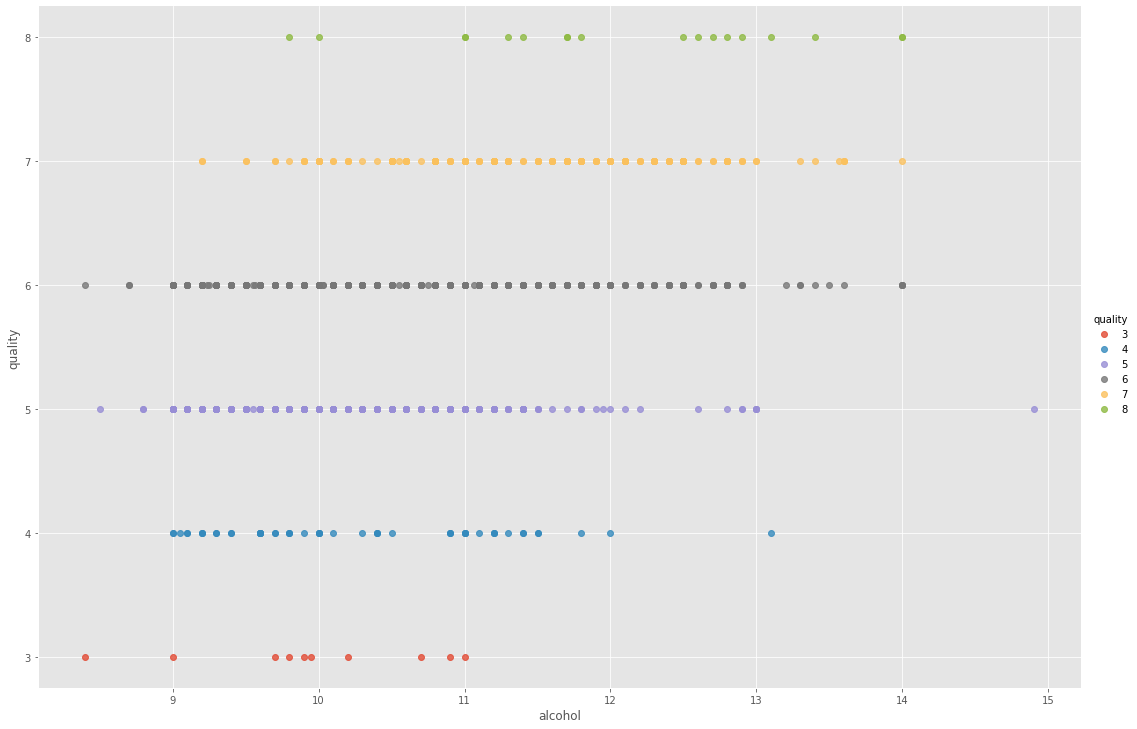

In [12]:
# New plot.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['total sulfur dioxide'], df['free sulfur dioxide'], '.') # use dot to represent data

# Set axis labels.
ax.set_xlabel('total sulfur dioxide')
ax.set_ylabel('free sulfur dioxide')

# Put this data as barchart
# Seaborn plot using quality distinguish data points
sns.lmplot(x="alcohol", y="quality", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);


In [13]:
# Grouping by quality
group = df.groupby('quality')
group

In [14]:
# Pivot tables.
group.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [15]:
# Creates a list of variable names
var_names = list(df.columns)

<br>
The following plots were generated using seaborn to visualise the spread of data.

Each plot below represents individual variables in the data set. 

Source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

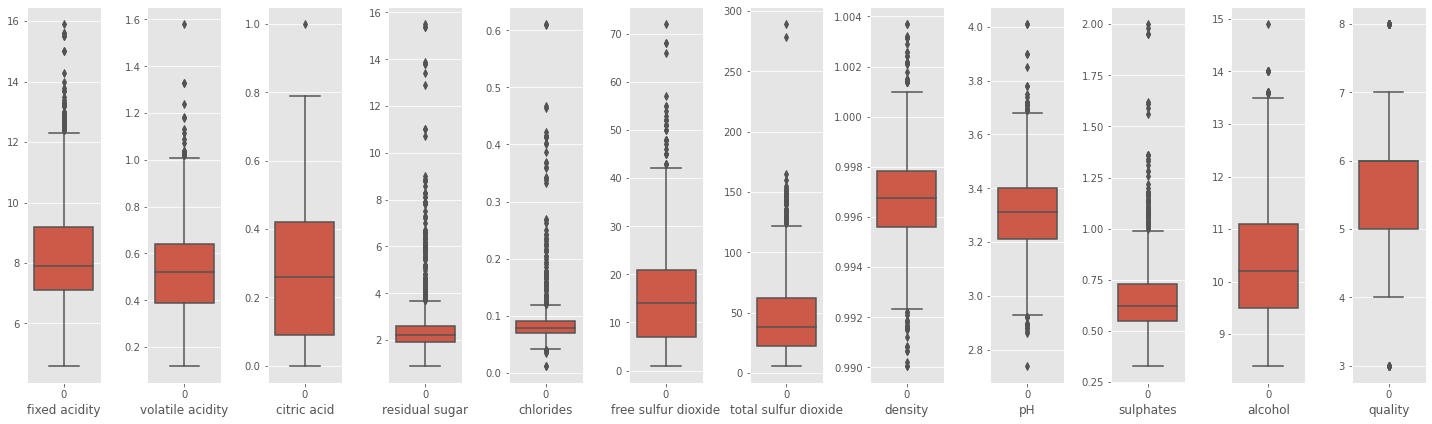

In [16]:
# Box plots.
fig = plt.figure(figsize=(20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in var_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.boxplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

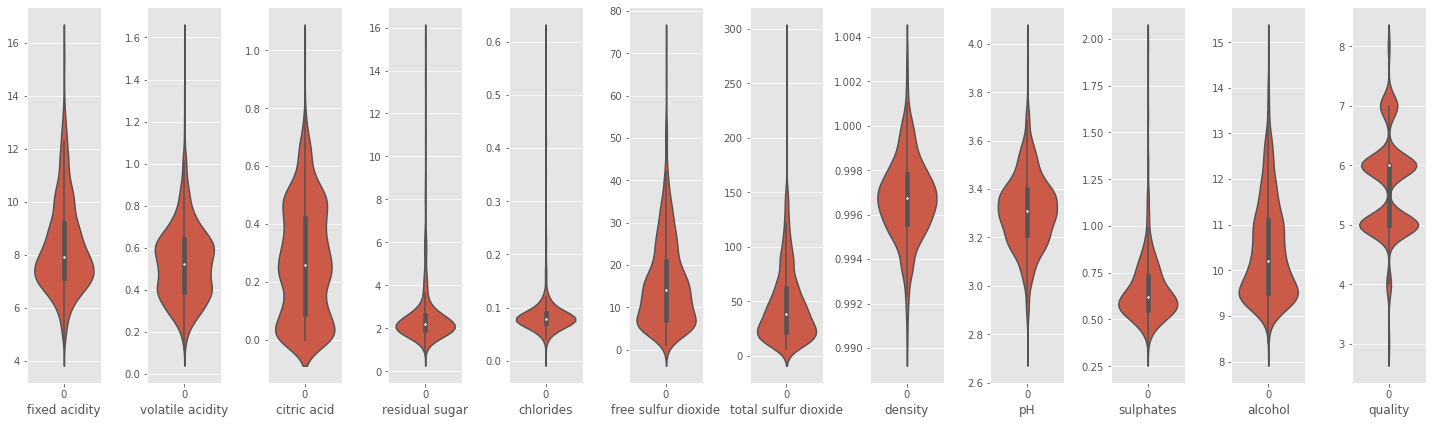

In [17]:
# Violin Plot
fig = plt.figure(figsize=(20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in var_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.violinplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

Observations for each variable:

- Quality: most values are between 5 and 7. While there are no values in categories 1, 2 and 10 and few values in categories 3, 4 ad 9. 
- 
See https://online.stat.psu.edu/stat508/lesson/wqd/wqd.1 for more observations.

# Test and Train Split

In [18]:
# Splits the dataframe.
train, test = mod.train_test_split(df)

In [19]:
# Views some of the training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
917,6.8,0.410,0.31,8.8,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6
856,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
1282,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6


In [20]:
# View indices of train array.
train.index

Int64Index([1597,    0,  917,  856, 1282,  789, 1296,  643,   32,  424,
            ...
             103,  143,  853,  411,  474,  863,  186, 1002,  640,  778],
           dtype='int64', length=1199)

In [21]:
# Shows some test data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5,5
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,5
348,9.6,0.56,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,6
1304,7.6,0.79,0.21,2.3,0.087,21.0,68.0,0.99550,3.12,0.44,9.2,5
791,8.8,0.64,0.17,2.9,0.084,25.0,130.0,0.99818,3.23,0.54,9.6,5


In [22]:
# Size of test data set.
test.index.size

400

<br>

## Checking the Test & Train Data

***

Ideally, we want the data to be segregated evenly throughout the data set. To check this, the following block of code was implemented to create a plot which depicts the test data as x's. As can be seen, the test data chose by scikit learn was evenly segregated from the data set. 

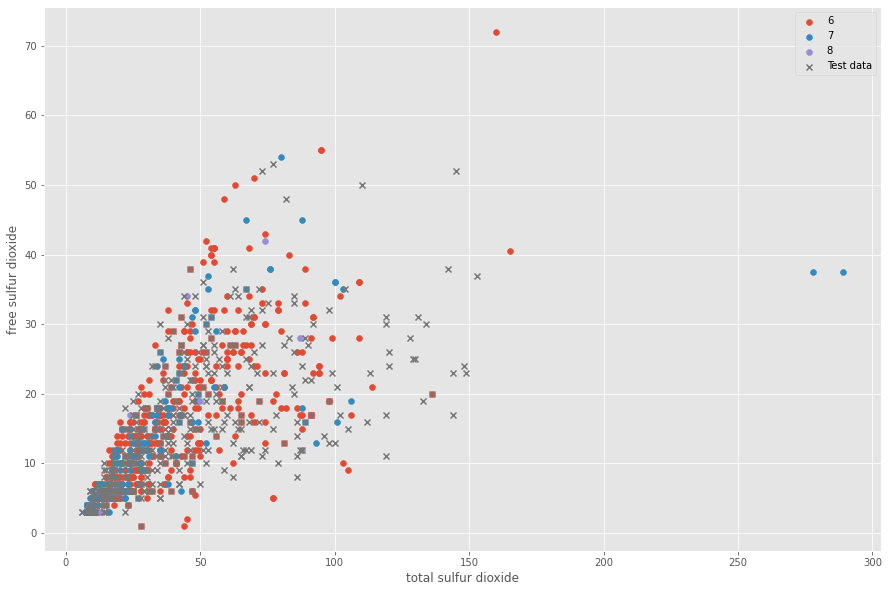

In [23]:
# Segregate the training data.
six = train[train['quality'] == 6]
seven = train[train['quality'] == 7]
eight = train[train['quality'] == 8]

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(six['total sulfur dioxide'], six['free sulfur dioxide'], marker='o', label='6')
ax.scatter(seven['total sulfur dioxide'], seven['free sulfur dioxide'], marker='o', label='7')
ax.scatter(eight['total sulfur dioxide'], eight['free sulfur dioxide'], marker='o', label='8')

# Scatter plot for testing data.
ax.scatter(test['total sulfur dioxide'], test['free sulfur dioxide'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('total sulfur dioxide')
ax.set_ylabel('free sulfur dioxide')
ax.legend();


In [24]:
# Gives inputs and outputs 
inputs, outputs = train[['total sulfur dioxide', 'free sulfur dioxide']], train['quality']

In [25]:
inputs.head()

,total sulfur dioxide,free sulfur dioxide
1597,44.0,32.0
0,34.0,11.0
917,45.0,26.0
856,55.0,41.0
1282,22.0,9.0


In [26]:
print(outputs)

1597    5
0       5
917     6
856     6
1282    6
       ..
863     5
186     5
1002    7
640     5
778     5
Name: quality, Length: 1199, dtype: int64


<br>

## Two Dimensions: Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [27]:
# Creates a new classifier.
lre = lm.LogisticRegression(random_state=0) # Parameter is random state, meaning returns same random process

# Train the classifier on the data.
lre.fit(inputs, outputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [28]:
# Classifies test data.
predictions = lre.predict(test[['total sulfur dioxide', 'free sulfur dioxide']])
predictions

array([5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6,

In [29]:
# View the misclassifications.
predictions == test['quality']

767      True
1322    False
348     False
1304     True
791      True
        ...  
1484    False
1179    False
915      True
967      True
1532     True
Name: quality, Length: 400, dtype: bool

In [30]:
# How accurate was the algorithm?
lre.score(test[['total sulfur dioxide', 'free sulfur dioxide']], test['quality'])

0.49

<br>

## Two Dimensions: Misclassified

In [31]:
# Append a column to the test data that shows the predictions.
test['predicted'] = predictions
predictions

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_32717/2335041746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


array([5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6,

In [32]:
# Shows the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,5,6
348,9.6,0.56,0.31,2.8,0.089,15.0,46.0,0.99790,3.11,0.92,10.0,6,5
1139,8.2,0.51,0.24,2.0,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,6,5
256,9.4,0.34,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.2,5,6
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,12.7,0.60,0.65,2.3,0.063,6.0,25.0,0.99970,3.03,0.57,9.9,5,6
613,8.2,0.39,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5,6
845,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,6
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,4,6


In [33]:
# View descriptive stats for quality.
train.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.262500,0.941250,0.155000,2.393750,0.124750,9.125000,23.375000,0.997280,3.400000,0.540000,9.931250
4,7.389474,0.688947,0.152895,2.702632,0.076316,11.921053,36.394737,0.996189,3.410526,0.576316,10.440789
5,8.106238,0.573411,0.239630,2.481189,0.093407,17.009747,56.629630,0.997050,3.307290,0.624250,9.899220
6,8.356211,0.502021,0.274547,2.498000,0.085512,15.894737,40.831579,0.996615,3.318611,0.668674,10.632842
7,8.871711,0.400987,0.383224,2.729934,0.074664,14.328947,36.046053,0.996036,3.287895,0.743224,11.506689
8,8.061538,0.442308,0.349231,2.238462,0.066385,15.384615,37.692308,0.994667,3.307692,0.765385,12.184615


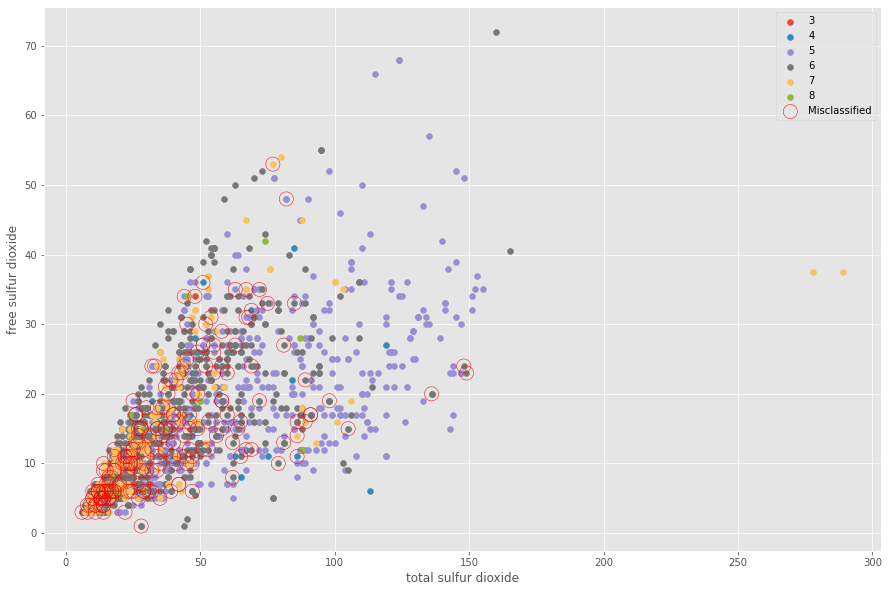

In [34]:
# New plot
fig, ax = plt.subplots()

# Plot the training data.
for quality, data in df.groupby('quality'):
    ax.scatter(data['total sulfur dioxide'], data['free sulfur dioxide'], label=quality)
    
ax.scatter(misclass['total sulfur dioxide'], misclass['free sulfur dioxide'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show legend
ax.set_xlabel('total sulfur dioxide')
ax.set_ylabel('free sulfur dioxide')
ax.legend()

<br>

## Using All Inputs

***

In [35]:
df = pd.read_csv("data/winequality_red.csv")

In [36]:
# Split data frame in two
train, test = mod.train_test_split(df)

In [37]:
# Makes all variables inputs.
inputs, outputs = train[var_names], train['quality']

In [38]:
# Creates new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on the data.T
lre.fit(inputs, outputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [39]:
# Requests classifier to classify the test data.T
predictions = lre.predict(test[var_names])
predictions

array([7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 6, 7, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 7, 5, 6, 6,
       6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5, 7, 5,
       5, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 7, 6, 5, 6, 6, 7, 5, 6, 6,
       6, 6, 5, 5, 5, 5, 7, 6, 6, 5, 6, 4, 7, 6, 5, 7, 5, 7, 5, 5, 7, 6,
       5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 4, 5, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6,
       5, 6, 5, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 7, 5,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 7, 7, 6, 5, 7, 6, 6,
       5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 7, 5, 6, 7, 7,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5,

In [40]:
# Views the misclassifications.
(predictions == test['quality']).value_counts()

True     326
False     74
Name: quality, dtype: int64

In [41]:
lre.score(test[var_names], test['quality'])

0.815

This algorithm predicted the correct quality based on the various chemical properties in "Enter number here" percent of cases. 

## Nearest Neighbours Classifier

In [42]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

# Creates a list the variables
var_names = list(df.columns)

In [43]:
# Splits the dataframe in two.
train, test = mod.train_test_split(df)

In [44]:
# Uses all variables as inputs
inputs, outputs = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']], train['quality']


In [45]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [46]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [47]:
# Test.
knn.score(test[var_names], test['quality'])

0.6025

In [48]:
# Predict.
predictions = knn.predict(test[['fixed acidity',
                                'volatile acidity',
                                'citric acid',
                                'residual sugar',
                                'chlorides',
                                'free sulfur dioxide',
                                'total sulfur dioxide',
                                'density',
                                'pH',
                                'sulphates',
                                'alcohol',
                                'quality']])
(predictions == test['quality']).value_counts()

True     241
False    159
Name: quality, dtype: int64

In [49]:
# Score/accuracy
(predictions == test['quality']).value_counts(normalize=True)

True     0.6025
False    0.3975
Name: quality, dtype: float64

Nearest neighbours was 89 percent accurate

<br>

## Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [50]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[var_names], df['quality'])
scores

array([0.53125   , 0.55625   , 0.54375   , 0.490625  , 0.54545455])

In [51]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}") 

Mean: 0.5334659090909091 	 Standard Deviation: 0.022842322434789248


In [52]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[var_names], df['quality'])
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.8625    , 0.834375  , 0.890625  , 0.90625   , 0.87147335])

In [53]:
print(f"Mean: {scores.mean()}, \t Standard Deviation: {scores.std()}")

Mean: 0.8730446708463949, 	 Standard Deviation: 0.024579114792353453


Logistic regression is a better algorithm for predicting the wine's quality based on its chemical components. 

<br>

# Linear Regression 

[Official Documentation]("https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html")

Source: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

https://medium.com/analytics-vidhya/introduction-to-linear-regression-sklearn-diabetes-dataset-f63378b0a1ee
***

Do this equation in LaTek.
y = mx + c 

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


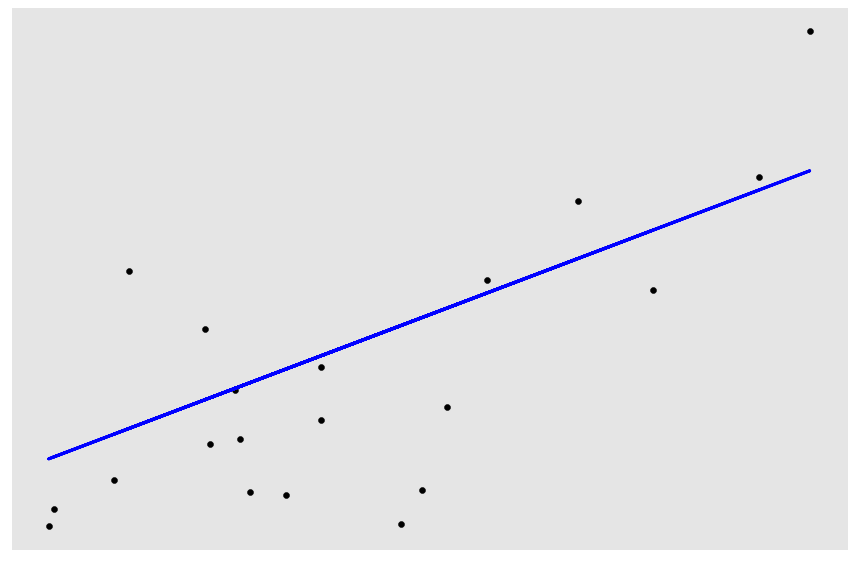

In [54]:
# Example from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data in two for train/test
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = lm.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Read in file from URL

In [175]:
# Read in csv from url.
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_csv(url, delimiter="\t")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [178]:
# Check dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [112]:
# Statistical summary. 
round(df.describe(),2)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,1.47,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,0.50,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,1.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,1.00,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,1.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,2.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,2.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00


In [171]:
# Add new column.
df['PROGRESSION'] = None

# Checks dataframe.
df.iloc[0]

AGE                59
SEX                 2
BMI              32.1
BP                101
S1                157
S2               93.2
S3                 38
S4                  4
S5             4.8598
S6                 87
Y                 151
PROGRESSION      None
Name: 0, dtype: object

In [172]:
# Check for missing values.
df.isna().sum()

AGE              0
SEX              0
BMI              0
BP               0
S1               0
S2               0
S3               0
S4               0
S5               0
S6               0
Y                0
PROGRESSION    442
dtype: int64

No missing values other than the recently added coolumn. 

<AxesSubplot:>

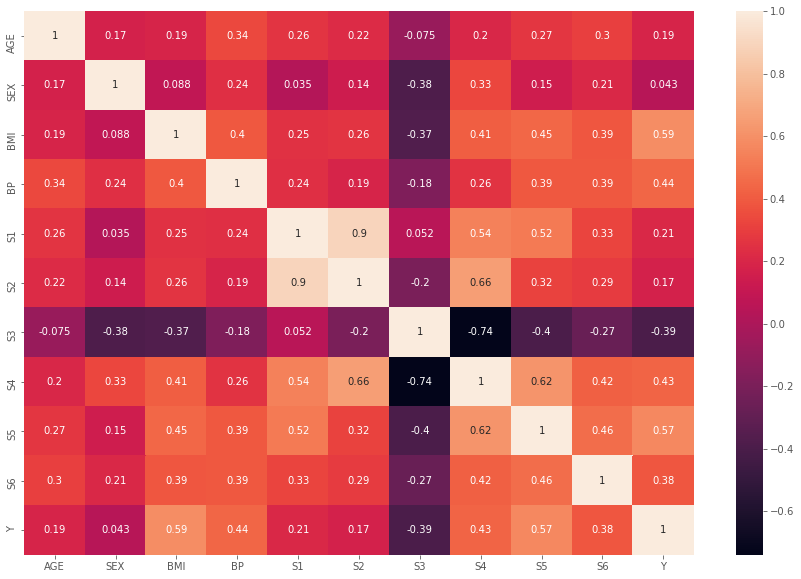

In [183]:
# Create heatmap to observe correlations.
sns.heatmap(df.corr(), annot=True)